In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Women's E-Commerce Clothing Reviews Dataset
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col=0)

data.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


<AxesSubplot:>

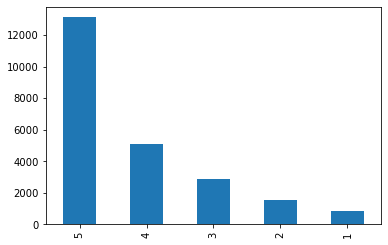

In [2]:
#  It is obvious that the dataset is massively unbalanced
data['Rating'].value_counts().plot(kind='bar')

In [3]:
# Correlation heatmap
# sns.heatmap(data.corr(), annot=True)

In [4]:
# Data Preprocessing

# Merge Title and Review Text
data['Review'] = data['Title'] + ' ' + data['Review Text']

# Dropping unneeded columns
data.drop(labels=['Clothing ID','Title','Review Text'], axis=1, inplace=True)

# Dropping columns with no reviews
data = data[~data['Review'].isnull()]

data.head(3)

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<AxesSubplot:title={'center':'sentiment analysis'}>

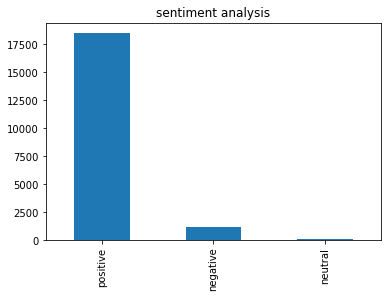

In [7]:
# Import NLP dependencies
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# # tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(data['Review Text'])


# Must clean up review text via tokenization, removing stopwords, etc.

analyzer = SentimentIntensityAnalyzer()

# Calculate polarity/sentiment scores from -1 to 1
data['score'] = data['Review'].apply(lambda Review: analyzer.polarity_scores(Review))
data['compound'] = data['score'].apply(lambda score_dict: score_dict['compound'])
# Classify each polarity score as strong negative, weak negative, 
# neutral, weak positive, and strong positive

data['sentiment_type']=''
## ** Error /w the code below you will get a blank column in the graph with values
# data.loc[data.compound <= -0.4, 'sentiment_type']='strong negative'
# data.loc[(data.compound < 0) & (data.compound >= -0.3), 'sentiment_type']='weak negative'
# data.loc[data.compound==0, 'sentiment_type']='neutral'
# data.loc[(data.compound > 0) & (data.compound <= 0.3), 'sentiment_type']='weak positive'
# data.loc[data.compound>=0.4, 'sentiment_type']='strong positive'

data.loc[data.compound<0, 'sentiment_type']='negative'
data.loc[data.compound==0, 'sentiment_type']='neutral'
data.loc[data.compound>0, 'sentiment_type']='positive'

#data.head(3)

data.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")



In [6]:
# Splitting Data into Train/Test
from sklearn.model_selection import train_test_split